# Análisis de los Datos


| Variable | Nombre de variable  | Unidad | Descripción 
| -- | -- | -- | --  
| Presión |TP2|   bar | Mide la Presión del Compresor 
| Presión |TP3 |  bar | Mide la Presión Generada en el neumático 
| Presión |H1| bar | Válvula activada 
| Presión | DV_pressure | bar |Mide la Presión generada cuando las Torres de Aire descargan el Agua 
|Presión | Reservoirs | bar | Mide la Presión del agua que se encuentra debajo de los depósitos |
| Temperatura | Oil_temperature |°C|Mide la Temperatura del Aceite en el Compresor| 
|Flujo| Flowmeter |m^3/h|Mide el flujo del aire
| Corriente | Motor_current |A| Mide la Corriente del Motor | 
|-| COMP |-| Se activa cuando hay aire en el compresor
|-| DV_eletric |-| Se activa cuando el compreso trabaja a bajo nivel
|-| Towers || Indica cual torre entrega agua y tiene humedad
|-| MPG |-| Se encarga de activar COMP, cuando el compresor trabaja a menos de 8.2 bares
|-| LPS |-| Se activa cuando la presión es menor a 7 bares
| Presión | Pressure_switch |-| Se activa cuando hay descarga de aire en las torres
|-| Oil_level |-| Se activa cuando el nivel de aceite en el compresor, es alto


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
from tqdm import tqdm

# Base de Datos

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dataset=pd.read_csv("/content/drive/MyDrive/Proyecto/dataset_train.csv")

In [ ]:
dataset

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,COMP,...,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,gpsLong,gpsLat,gpsSpeed,gpsQuality
0,2022-01-01 06:00:00,-0.012,9.758,9.760,-0.028,1.576,63.350,19.049625,3.9550,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
1,2022-01-01 06:00:01,-0.012,9.760,9.760,-0.028,1.578,63.250,19.049625,4.0275,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
2,2022-01-01 06:00:02,-0.010,9.760,9.760,-0.028,1.578,63.325,19.040281,3.9450,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
3,2022-01-01 06:00:03,-0.012,9.756,9.756,-0.030,1.576,63.200,19.040281,3.9300,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
4,2022-01-01 06:00:04,-0.012,9.756,9.756,-0.030,1.578,63.150,19.049625,3.9950,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10979541,2022-06-02 15:49:49,-0.010,8.444,8.204,-0.032,1.466,63.200,19.227156,0.0050,1,...,1,1,0,0,0,0,0.00000,0.0000,0,0
10979542,2022-06-02 15:49:50,-0.010,8.442,8.204,-0.034,1.466,63.200,19.217813,0.0050,1,...,1,1,0,0,0,0,0.00000,0.0000,0,0
10979543,2022-06-02 15:49:51,-0.010,8.438,8.202,-0.032,1.464,63.225,19.217813,0.0050,1,...,1,1,0,0,0,0,0.00000,0.0000,0,0
10979544,2022-06-02 15:49:52,-0.010,8.438,8.202,-0.032,1.466,63.175,19.217813,0.0050,1,...,1,1,0,0,0,0,0.00000,0.0000,0,0


## Análisis Exploratorio

#### Resumen Estadistica Descriptiva 

In [6]:
dataset.describe()

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,gpsLong,gpsLat,gpsSpeed,gpsQuality
count,1.097955e+07,1.097955e+07,1.097955e+07,1.097955e+07,1.097955e+07,1.097955e+07,1.097955e+07,1.097955e+07,1.097955e+07,1.097955e+07,1.097955e+07,1.097955e+07,1.097955e+07,10979546.0,1.097955e+07,1.097955e+07,1.097955e+07,1.097955e+07,1.097955e+07,1.097955e+07
mean,1.118317e+00,8.931651e+00,7.730870e+00,-3.825708e-02,1.546639e+00,6.692224e+01,2.030699e+01,2.336845e+00,8.688848e-01,1.277537e-01,9.325853e-01,8.688843e-01,6.163734e-03,0.0,2.732353e-07,1.461172e-03,-4.446051e+00,2.120493e+01,5.025135e+00,5.148095e-01
std,3.066012e+00,1.026502e+00,3.104537e+00,2.744263e-01,3.362905e-01,8.653277e+00,3.891984e+00,2.230631e+00,3.375263e-01,3.338154e-01,2.507389e-01,3.375269e-01,7.826712e-02,0.0,5.227191e-04,3.819734e-02,4.316384e+00,2.058590e+01,1.163159e+01,4.997807e-01
min,-4.000000e+00,-4.000000e+00,-4.000000e+00,-4.000000e+00,-4.000000e+00,-5.000000e+01,2.500000e-01,-5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,-9.130040e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-8.000000e-03,8.486000e+00,8.236000e+00,-3.200000e-02,1.470000e+00,6.370000e+01,1.901225e+01,2.500000e-03,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,-8.658910e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,-8.000000e-03,8.990000e+00,8.758000e+00,-2.800000e-02,1.592000e+00,6.825000e+01,1.904028e+01,3.702500e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,-8.542720e+00,4.115460e+01,0.000000e+00,1.000000e+00
75%,-6.000000e-03,9.484000e+00,9.280000e+00,-2.600000e-02,1.638000e+00,7.105000e+01,1.925519e+01,3.835000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,4.118820e+01,0.000000e+00,1.000000e+00
max,2.230960e+01,1.040800e+01,1.041400e+01,8.326000e+00,2.054000e+00,9.790000e+01,4.307241e+01,9.685000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000e+00,1.000000e+00,0.000000e+00,4.194900e+01,3.230000e+02,1.000000e+00


#### Matriz de correlación

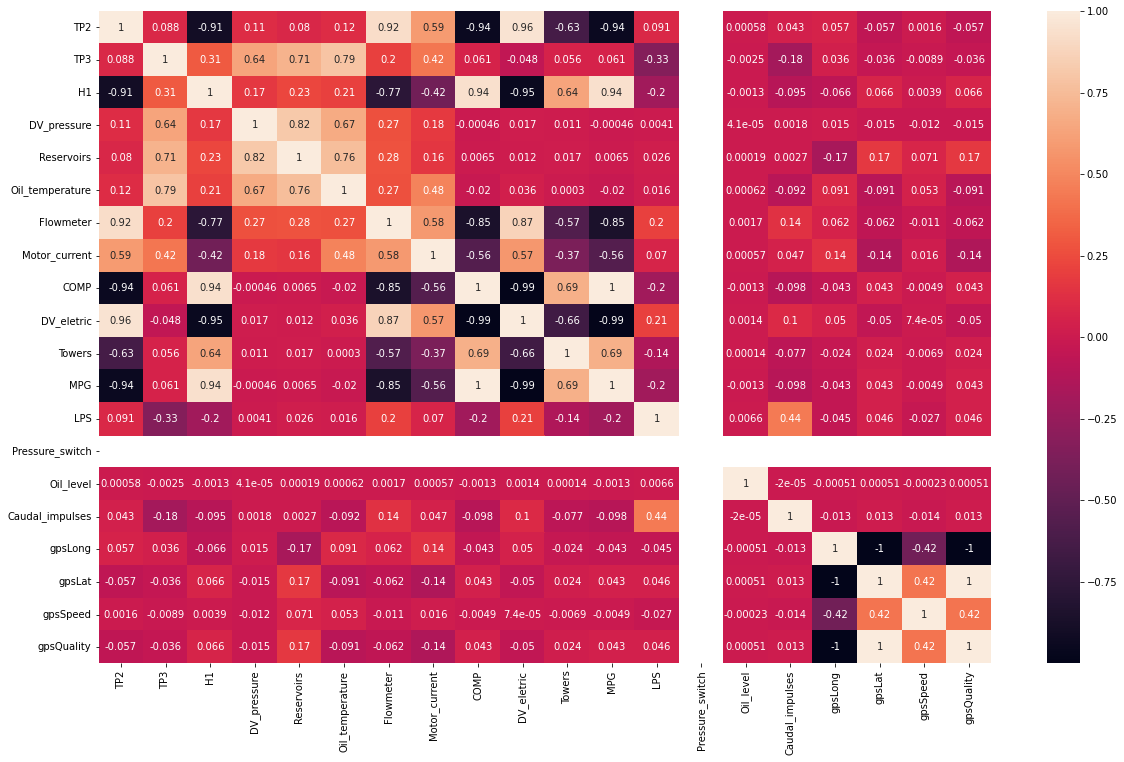

In [7]:
correlation_mat = dataset.corr()
f, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(correlation_mat, annot = True)
plt.show()

#### Otras caracteristicas del DataFrame

In [8]:
dataset.shape

(10979546, 21)

In [14]:
dataset.columns.values

array(['timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Flowmeter', 'Motor_current', 'COMP',
       'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch',
       'Oil_level', 'Caudal_impulses', 'gpsLong', 'gpsLat', 'gpsSpeed',
       'gpsQuality'], dtype=object)

### Datos creados

Inicialmente se crean las tablas de los sensores Análogos (APU01) y digitales (APU02) con el fin de encontrar fallos o una fácil interpretación. 

#### Creación Tabla APU01

In [ ]:
APU01=dataset.iloc[:,:9]
APU01

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current
0,2022-01-01 06:00:00,-0.012,9.758,9.760,-0.028,1.576,63.350,19.049625,3.9550
1,2022-01-01 06:00:01,-0.012,9.760,9.760,-0.028,1.578,63.250,19.049625,4.0275
2,2022-01-01 06:00:02,-0.010,9.760,9.760,-0.028,1.578,63.325,19.040281,3.9450
3,2022-01-01 06:00:03,-0.012,9.756,9.756,-0.030,1.576,63.200,19.040281,3.9300
4,2022-01-01 06:00:04,-0.012,9.756,9.756,-0.030,1.578,63.150,19.049625,3.9950
...,...,...,...,...,...,...,...,...,...
10979541,2022-06-02 15:49:49,-0.010,8.444,8.204,-0.032,1.466,63.200,19.227156,0.0050
10979542,2022-06-02 15:49:50,-0.010,8.442,8.204,-0.034,1.466,63.200,19.217813,0.0050
10979543,2022-06-02 15:49:51,-0.010,8.438,8.202,-0.032,1.464,63.225,19.217813,0.0050
10979544,2022-06-02 15:49:52,-0.010,8.438,8.202,-0.032,1.466,63.175,19.217813,0.0050


#### Creación Tabla APU02

In [ ]:
APU02=dataset.iloc[:,9:17]
APU02

,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,1,0,1,1,0,0,0,0
1,1,0,1,1,0,0,0,0
2,1,0,1,1,0,0,0,0
3,1,0,1,1,0,0,0,0
4,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...
10979541,1,0,1,1,0,0,0,0
10979542,1,0,1,1,0,0,0,0
10979543,1,0,1,1,0,0,0,0
10979544,1,0,1,1,0,0,0,0


# Ejemplos fallos positivos y fallos negativos

Toma de información en un rango de 24 horas, con 60 segundos de diferencia para los fallos.

#### Fallos positivos

In [ ]:
dataset['timestamp']=pd.to_datetime(dataset['timestamp'], format='%Y-%m-%d %H:%M:%S') # Convertir el tipo object a date time 

#### Fallo Air Dryer

In [ ]:
start_date_AD=pd.Timestamp('2022-02-27 19:53:00')
end_date_AD=pd.Timestamp('2022-02-28 19:53:00')


#### Fallo Clients

In [ ]:
start_date_clients=pd.Timestamp('2022-03-21 12:55:00')
end_date_clients=pd.Timestamp('2022-03-22 12:55:00')


#### Fallo Compressor

In [ ]:
start_date_compressor=pd.Timestamp('2022-05-29 10:00:00')
end_date_compressor=pd.Timestamp('2022-05-30 10:00:00')


### Fallos negativos

Se tomaron 24 horas con 1 segundo de diferencia, cuando no hay fallos.

#### Primer fallo negativo (Air Dryer)

In [ ]:
start_date_no_fail1AD=pd.Timestamp('2022-02-15 19:53:00')
end_date_no_fail1AD=pd.Timestamp('2022-02-16 19:53:00')


In [ ]:
start_date_no_fail2AD=pd.Timestamp('2022-03-11 19:53:00')
end_date_no_fail2AD=pd.Timestamp('2022-03-12 19:53:00')


#### Segundo fallo negativo (Clients)

In [ ]:
start_date_no_fail1c=pd.Timestamp('2022-03-07 12:55:00')
end_date_no_fail1c=pd.Timestamp('2022-03-08 12:55:00')


In [ ]:
start_date_no_fail2c=pd.Timestamp('2022-04-04 12:55:00')
end_date_no_fail2c=pd.Timestamp('2022-04-05 12:55:00')


#### Tercer fallo negativo (Compressor)

In [ ]:
start_date_no_fail1cr=pd.Timestamp('2022-05-15 10:00:00')
end_date_no_fail1cr=pd.Timestamp('2022-05-16 10:00:00')


In [ ]:
start_date_no_fail2cr=pd.Timestamp('2022-06-12 10:00:00')
end_date_no_fail2cr=pd.Timestamp('2022-06-12 10:00:00')


### Función

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def fails_function(database,start_date,end_date,time,T, label):
   mask=((database['timestamp'] >= start_date) & (database['timestamp'] <= end_date))
   index_fail = dataset.loc[mask]
   reset = index_fail.reset_index(drop=True)

   # Realización de remuestreo
   reset_resample = reset.resample(time, on='timestamp').mean().ffill()
   target = T * np.ones((len(reset_resample)))
   specific_label = label * np.ones((len(reset_resample)))

   # Preprocesamiento
   clean_data=reset_resample.iloc[:,1:20] #Limpieza de datos 
   scaler = MinMaxScaler().fit(clean_data) #Normalización
   normalized = scaler.transform(clean_data)

   return  target, normalized, specific_label


#### Fallos positivos

In [ ]:
first_fail_target, first_fail_normalized, first_fail_sl = fails_function(dataset, start_date_AD,end_date_AD, '60S', 1, 0)

In [ ]:
second_fail_target, second_fail_normalized, second_fail_sl = fails_function(dataset, start_date_clients, end_date_clients, '60S', 1, 0)

In [ ]:
third_fail_target, third_fail_normalized, third_fail_sl = fails_function(dataset, start_date_compressor, end_date_compressor, '60S', 1 , 1)

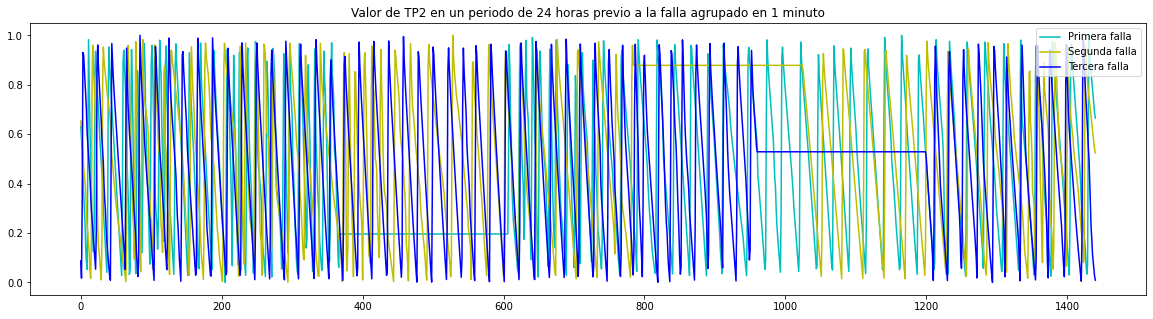

In [ ]:
plt.figure(figsize=(20, 5))
plt.title("Valor de TP2 en un periodo de 24 horas previo a la falla agrupado en 1 minuto")
plt.plot(first_fail_normalized[:, 0], 'c')
plt.plot(second_fail_normalized[:, 0], 'y')
plt.plot(third_fail_normalized[:, 0], 'b')
plt.legend(["Primera falla", "Segunda falla", "Tercera falla"])

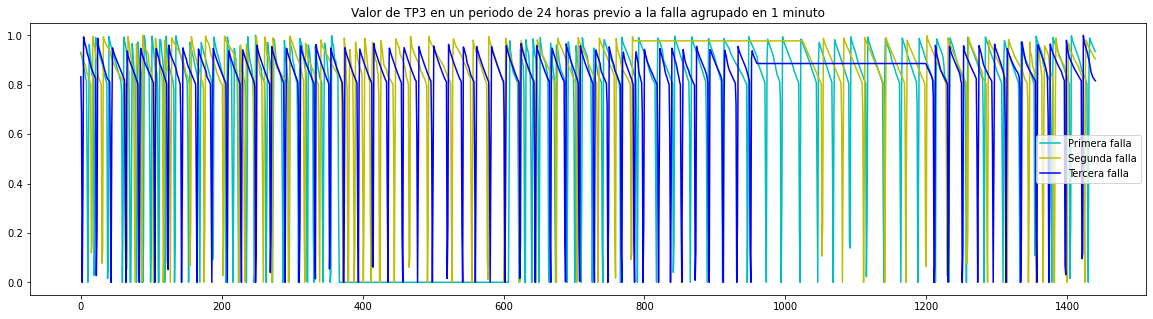

In [ ]:
plt.figure(figsize=(20, 5))
plt.title("Valor de TP3 en un periodo de 24 horas previo a la falla agrupado en 1 minuto")
plt.plot(first_fail_normalized[:, 1], 'c')
plt.plot(second_fail_normalized[:, 1], 'y')
plt.plot(third_fail_normalized[:, 1], 'b')
plt.legend(["Primera falla", "Segunda falla", "Tercera falla"])

#### Fallos negativos

##### Primer fallo positivo (Air Dryer)

In [ ]:
first_fail_negative1AD_target, first_fail_negative1AD_normalized, first_fail_negative1AD_sl = fails_function(dataset, start_date_no_fail1AD, end_date_no_fail1AD, '60S', 0, 2)

##### Primer fallo positivo (Clients)

In [ ]:
second_fail_negative1c_target, second_fail_negative1c_normalized, second_fail_negative1c_sl = fails_function(dataset, start_date_no_fail1c, end_date_no_fail1c,'60S', 0, 2)

##### Primer fallo positivo (Compressor)

In [ ]:
third_fail_negative1cr_target, third_fail_negative1cr_normalized, third_fail_negative1cr_target_sl = fails_function(dataset, start_date_no_fail1cr, end_date_no_fail1cr, '60S', 0, 2)

#### Apilación arreglos fallos positivos y negativos

In [ ]:
dataset_first = np.vstack((first_fail_normalized,first_fail_negative1AD_normalized))
targets_first = np.hstack((first_fail_target, first_fail_negative1AD_target))
sl_first = np.hstack((first_fail_sl, first_fail_negative1AD_sl))

In [ ]:
dataset_second = np.vstack((second_fail_normalized,second_fail_negative1c_normalized))
targets_second = np.hstack((second_fail_target, second_fail_negative1c_target))
sl_second = np.hstack((second_fail_sl, second_fail_negative1c_sl))

In [ ]:
dataset_third = np.vstack((third_fail_normalized,third_fail_negative1cr_normalized))
targets_third = np.hstack((third_fail_target, third_fail_negative1cr_target))
sl_third = np.hstack((third_fail_sl, third_fail_negative1cr_target_sl))

In [ ]:
dataset_total = np.vstack((dataset_first,dataset_second,dataset_third))
targets_total = np.hstack((targets_first, targets_second, targets_third))
sl_total = np.hstack((sl_first, sl_second, sl_third))

In [ ]:
targets_total

array([1., 1., 1., ..., 0., 0., 0.])

# Reducción de Dimensionalidad

## Principal Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA()

In [ ]:
dataset_total_pca=pca.fit(dataset_total).transform(dataset_total)

## Gráficas de PCA 

Text(0, 0.5, 'Porcentaje de varianza explicada [ % ]')

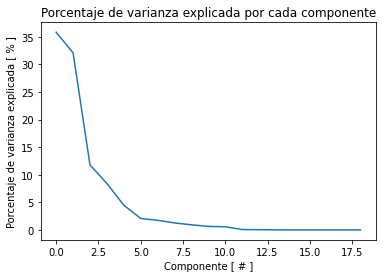

In [ ]:
plt.plot(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_*100)
plt.title("Porcentaje de varianza explicada por cada componente")
plt.xlabel("Componente [ # ]")
plt.ylabel("Porcentaje de varianza explicada [ % ]")

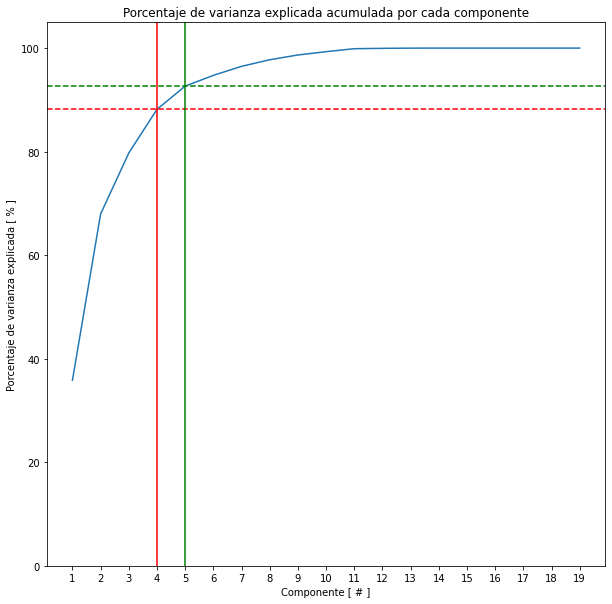

In [ ]:
def plot_cum_pca(pca_obj):
    p_explained_variance = pca_obj.explained_variance_ratio_
    p_explained_variance_cum = np.cumsum(p_explained_variance)
    x_axis = 1 + np.arange(len(p_explained_variance))
    x_more_than_80 = x_axis[np.argwhere(p_explained_variance_cum > 0.8)[0]]
    y_more_than_80 = p_explained_variance_cum[x_more_than_80 - 1]
    x_more_than_90 = x_axis[np.argwhere(p_explained_variance_cum > 0.9)[0]]
    y_more_than_90 = p_explained_variance_cum[x_more_than_90 - 1]
    plt.figure(figsize = (10, 10))
    plt.plot(x_axis, 100 * p_explained_variance_cum)
    plt.axhline(100*y_more_than_80, color='r', ls='--')
    plt.axvline(x_axis[np.argwhere(np.cumsum(p_explained_variance) > 0.8)[0]], color='r')
    plt.axhline(100*y_more_than_90, color='g', ls='--')
    plt.axvline(x_axis[np.argwhere(np.cumsum(p_explained_variance) > 0.9)[0]], color='g')
    plt.title("Porcentaje de varianza explicada acumulada por cada componente")
    plt.xlabel("Componente [ # ]")
    plt.ylabel("Porcentaje de varianza explicada [ % ]")
    plt.xticks(x_axis)
    plt.ylim([0, 105])
    
plot_cum_pca(pca)

Se puede notar que con $4$ componentes se explica al menos un $80\%$ de la varianza de los datos y que con $5$ componentes se explica al menos un $90\%$.

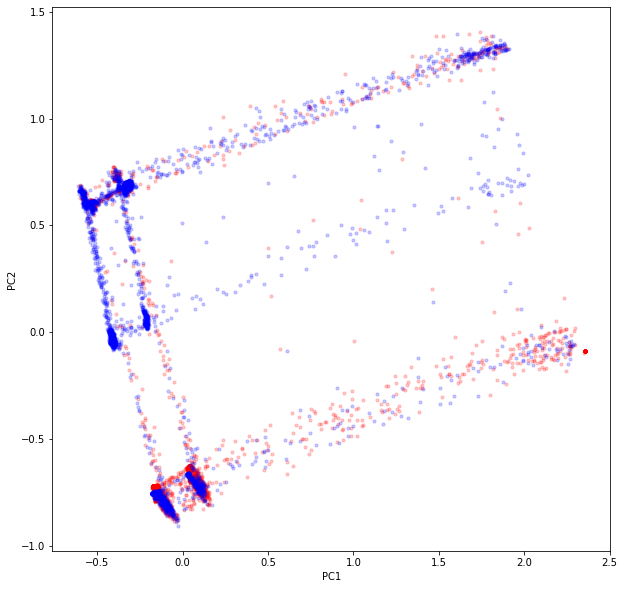

In [ ]:

plt.figure(figsize=(10,10))

plt.scatter(dataset_total_pca[targets_total == 1, 0],dataset_total_pca[targets_total == 1, 1], s = 10, c='r', alpha=0.2)
plt.scatter(dataset_total_pca[targets_total == 0, 0],dataset_total_pca[targets_total == 0, 1], s = 10, c='b', alpha=0.2)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


Al graficar los puntos del dataset en las dos primeras componentes principales se puede notar que hay ciertas zonas con similaridad entre puntos de falla y no falla por ejemplo en la zona $(x:[-1, 0.5] , y:[-0.5, 1])$. En otras zonas se puede evidenciar mayor divergencia.

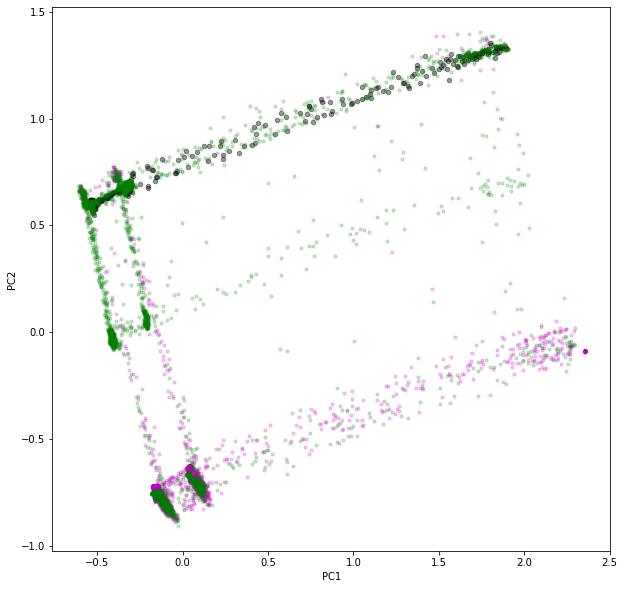

In [ ]:

plt.figure(figsize=(10,10))

plt.scatter(dataset_total_pca[sl_total == 0, 0],dataset_total_pca[sl_total == 0, 1], s = 10, c='m', alpha=0.2)
plt.scatter(dataset_total_pca[sl_total == 1, 0],dataset_total_pca[sl_total == 1, 1], s = 20, c='k', alpha=0.4)
plt.scatter(dataset_total_pca[sl_total == 2, 0],dataset_total_pca[sl_total == 2, 1], s = 10, c='g', alpha=0.2)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


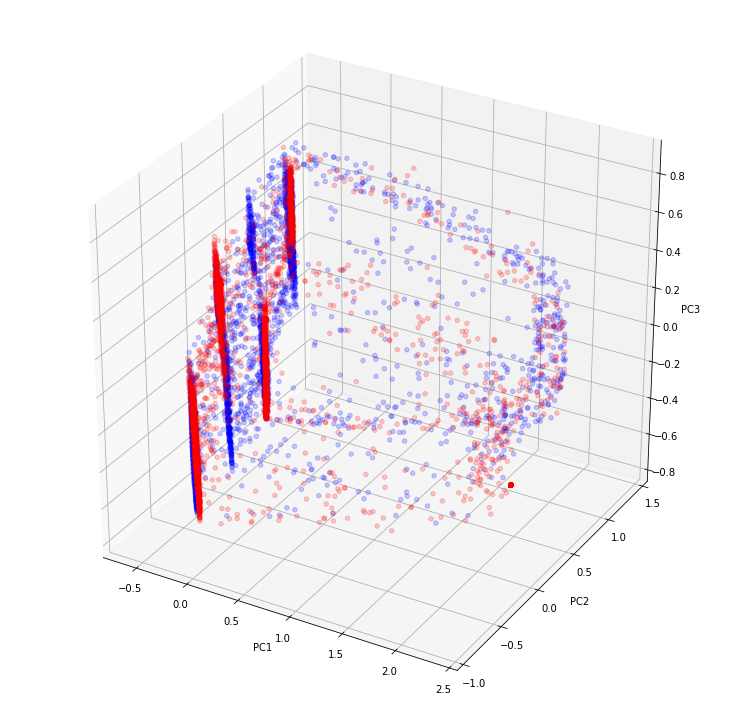

In [ ]:
fig = plt.figure()
fig.set_size_inches(13, 13)
ax = fig.add_subplot(111, projection = '3d')

x = dataset_total_pca[:, 0]
y = dataset_total_pca[:, 1]
z = dataset_total_pca[:, 2]

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

ax.scatter(x[targets_total == 0], y[targets_total == 0], z[targets_total == 0], s = 20, c='b', alpha=0.2)
ax.scatter(x[targets_total == 1], y[targets_total == 1], z[targets_total == 1], s = 20, c='r', alpha=0.2)

plt.show()

Al graficar las tres primeras componentes principales se puede notar que es más fácil diferenciar ciertos grupos de falla y no falla. Se evidencian columnas de puntos  que son más densas que otras zonas del espacio.

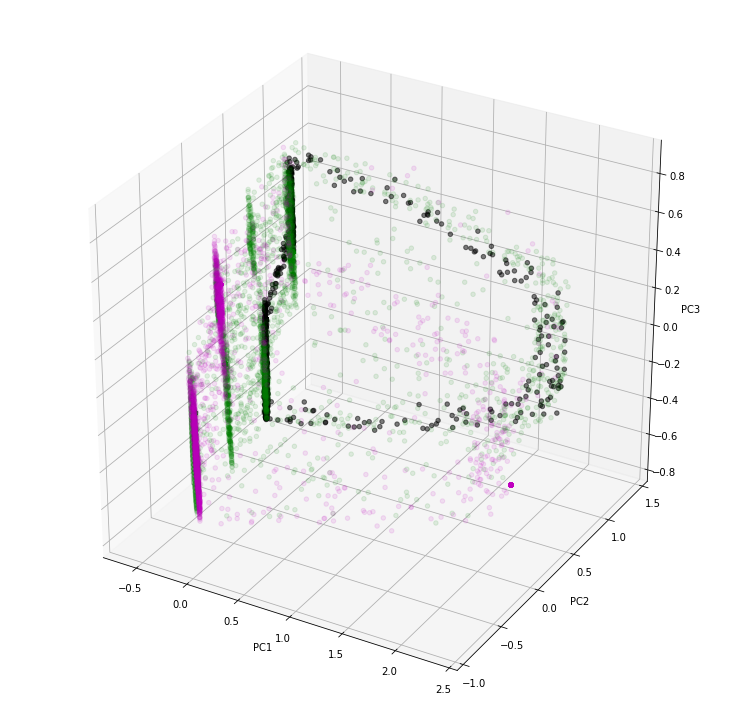

In [ ]:
fig = plt.figure()
fig.set_size_inches(13, 13)
ax = fig.add_subplot(111, projection = '3d')

x = dataset_total_pca[:, 0]
y = dataset_total_pca[:, 1]
z = dataset_total_pca[:, 2]

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

ax.scatter(x[sl_total == 0], y[sl_total == 0], z[sl_total == 0], s = 20, c='m', alpha=0.1)
ax.scatter(x[sl_total == 1], y[sl_total == 1], z[sl_total == 1], s = 20, c='k', alpha=0.5)
ax.scatter(x[sl_total == 2], y[sl_total == 2], z[sl_total == 2], s = 20, c='g', alpha=0.1)

plt.show()

Al graficar los puntos en las tres primeras componentes principales con color correspondiente a la etiqueta específica (fallo de fuga de aire, fuga de aceite y no falla) se puede evienciar que en la zona de las columnas  los puntos magenta(fuga de aire) y los verdes (no falla) se podrían separar más fácilmente que los puntos verdes de los negros.

# Clustering

### Analisis de Silueta KMeans

Para n_clusters =  2  -  El valor de silueta promedio es =  0.5057079798669631
Para n_clusters =  3  -  El valor de silueta promedio es =  0.46605425784408144
Para n_clusters =  4  -  El valor de silueta promedio es =  0.4798074835420583
Para n_clusters =  5  -  El valor de silueta promedio es =  0.4555392530372904
Para n_clusters =  6  -  El valor de silueta promedio es =  0.466370387078214


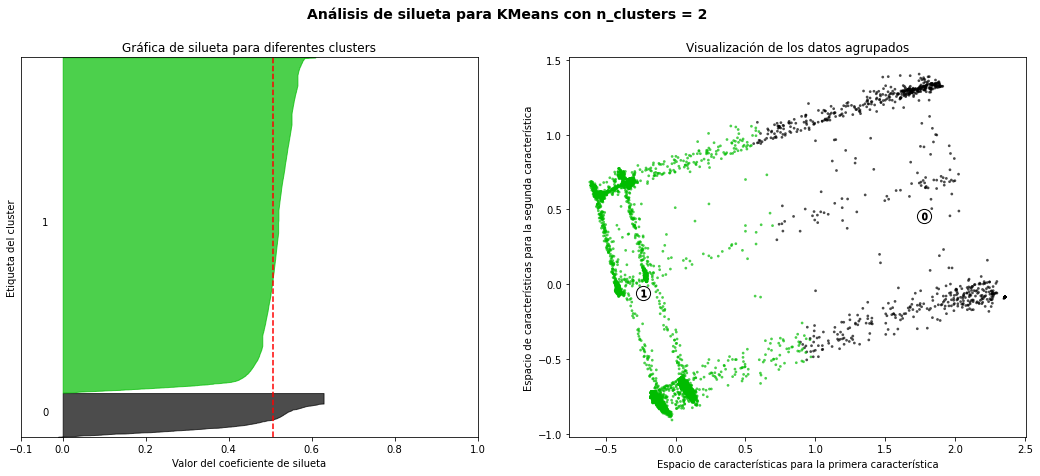

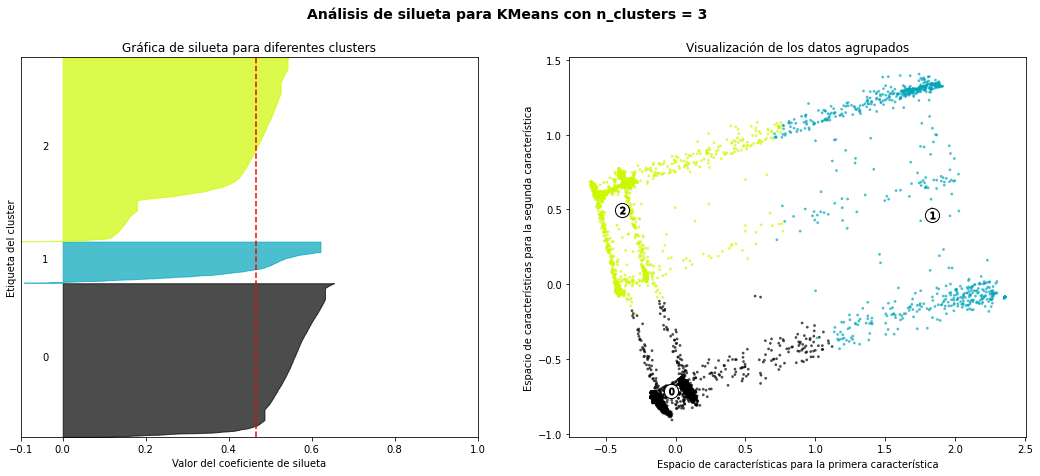

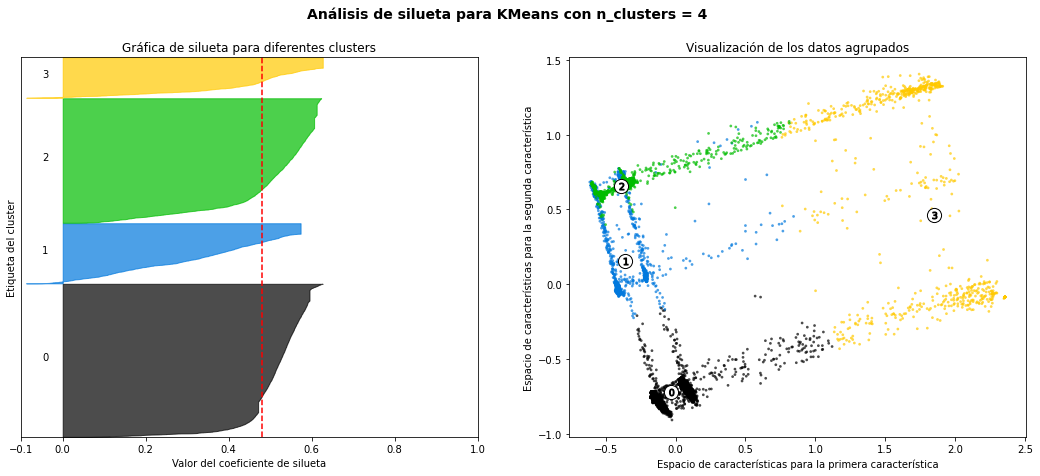

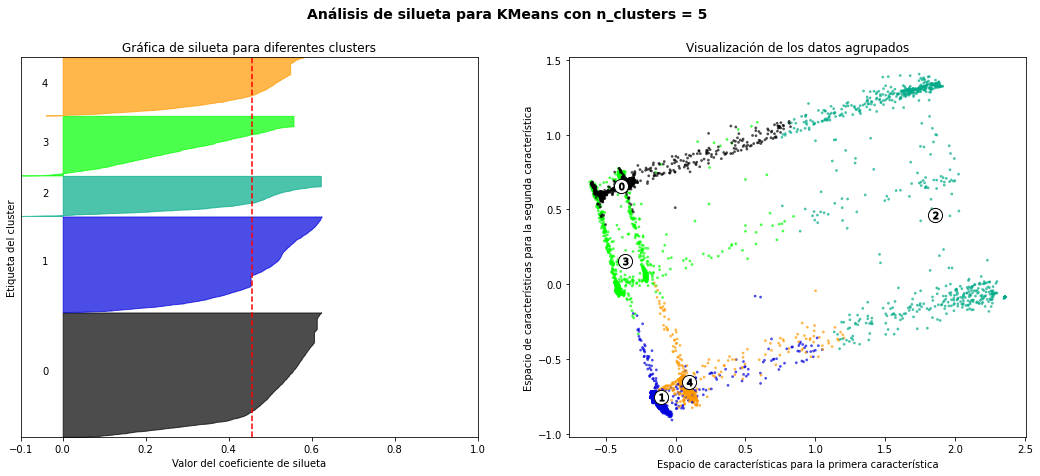

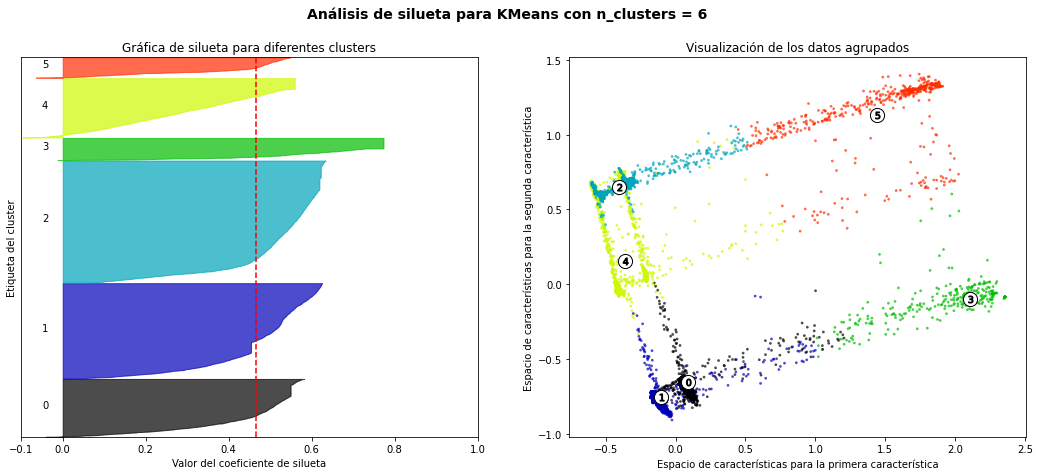

In [ ]:
def plot_silhouettes_kmeans(input_data):

    from sklearn.metrics import silhouette_samples, silhouette_score
    from sklearn.cluster import KMeans
    import matplotlib.cm as cm

    # Generating the sample data from make_blobs
    # This particular setting has one distinct cluster and 3 clusters placed close
    # together.
    X = input_data 


    range_n_clusters = range(2, 7)

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "Para n_clusters = ",
            n_clusters, " - ",
            "El valor de silueta promedio es = ",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("Gráfica de silueta para diferentes clusters")
        ax1.set_xlabel("Valor del coeficiente de silueta")
        ax1.set_ylabel("Etiqueta del cluster")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("Visualización de los datos agrupados")
        ax2.set_xlabel("Espacio de características para la primera característica")
        ax2.set_ylabel("Espacio de características para la segunda característica")

        plt.suptitle(
            "Análisis de silueta para KMeans con n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()
    
plot_silhouettes_kmeans(dataset_total_pca[:, 0:5])

### Análisis de Silueta Clustering Jerárquico

For n_clusters = 2 The average silhouette_score is : 0.47518173013854076
For n_clusters = 3 The average silhouette_score is : 0.4524002337090049
For n_clusters = 4 The average silhouette_score is : 0.4543778708459695
For n_clusters = 5 The average silhouette_score is : 0.4650881347539421


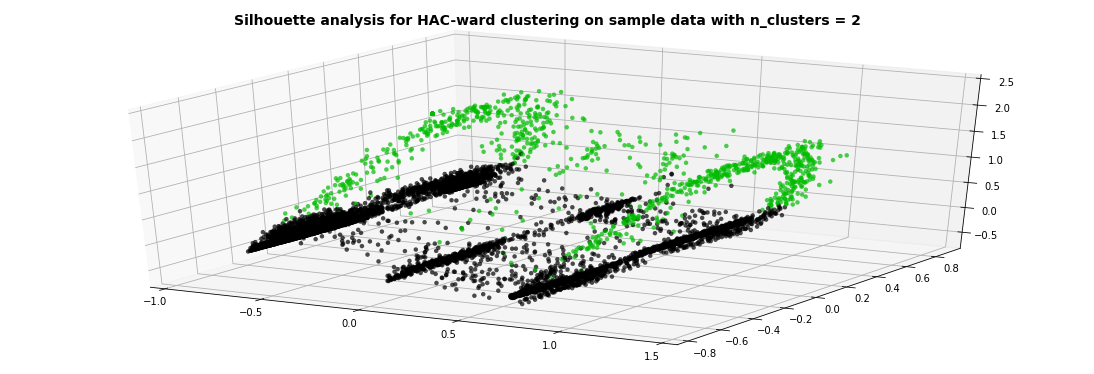

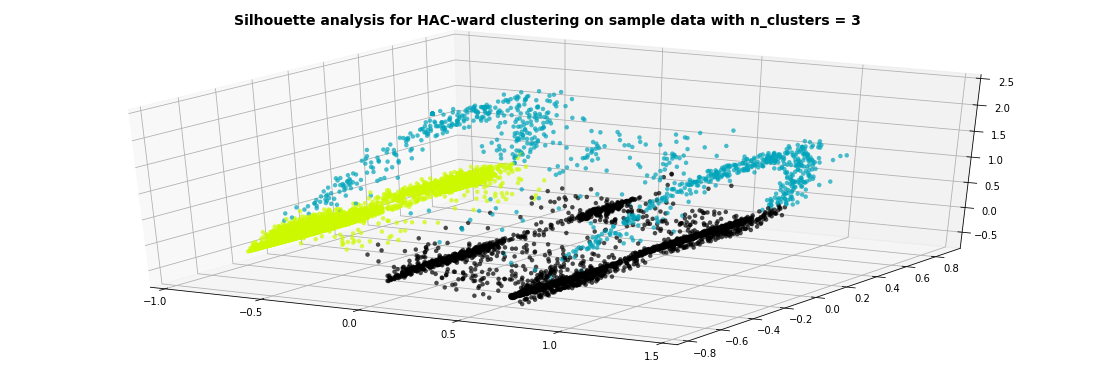

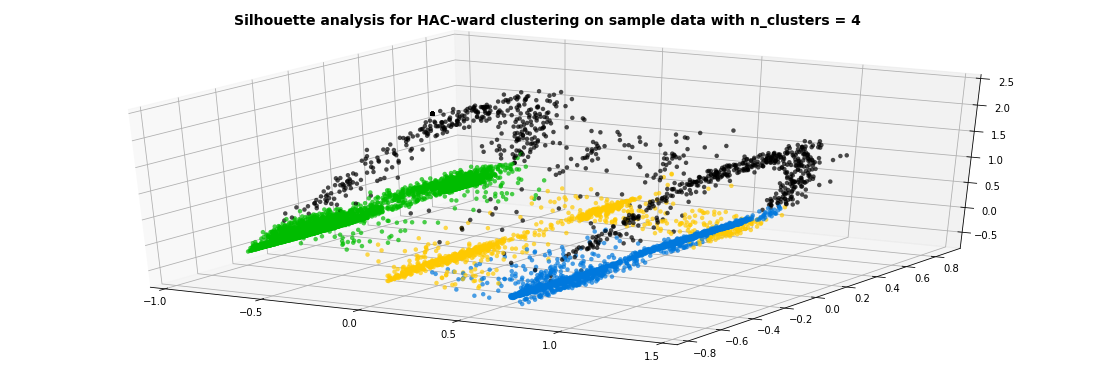

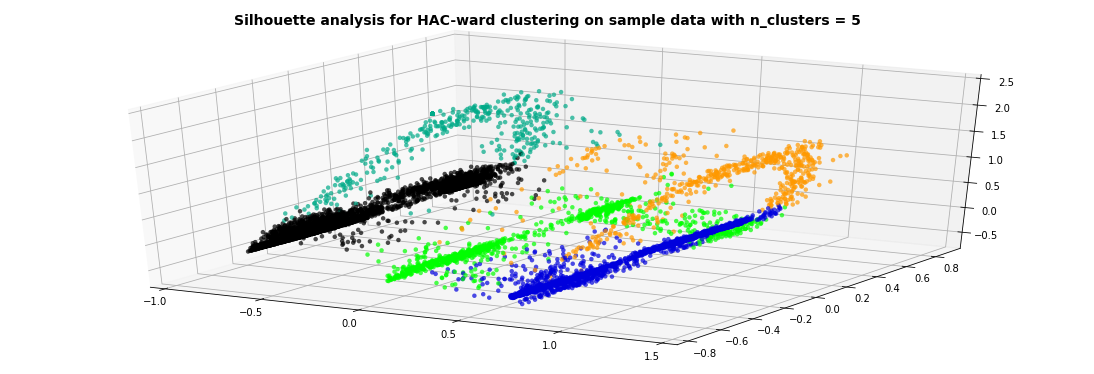

Best Nbr of Clusters = 2, according to silhouette score: 0.48


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestCentroid

def clustering(df1):
    X = df1
    range_n_clusters = range(2, 6)
    silhouette_values = {}
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
        y_predict = clusterer.fit_predict(X)
        cluster_labels = clusterer.labels_

        clf = NearestCentroid()
        clf.fit(X, y_predict)
        #print("Centroids:")
        #print(clf.centroids_)

        silhouette_avg = silhouette_score(X, cluster_labels)
        if silhouette_avg > 0.4:
            print("For n_clusters =", n_clusters,
                  "The average silhouette_score is :", silhouette_avg)
            silhouette_values[n_clusters] = silhouette_avg
            fig, (ax1, ax2) = plt.subplots(1, 2)

            fig.set_size_inches(15, 5)

            ax1.set_xlim([-0.1, 1])
            ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

            sample_silhouette_values = silhouette_samples(X, cluster_labels)

            y_lower = 10
            for i in range(n_clusters):
                ith_cluster_silhouette_values = \
                    sample_silhouette_values[cluster_labels == i]

                ith_cluster_silhouette_values.sort()

                size_cluster_i = ith_cluster_silhouette_values.shape[0]
                y_upper = y_lower + size_cluster_i

                color = cm.nipy_spectral(float(i) / n_clusters)
                ax1.fill_betweenx(np.arange(y_lower, y_upper),
                                  0, ith_cluster_silhouette_values,
                                  facecolor=color, edgecolor=color, alpha=0.7)
                ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
                y_lower = y_upper + 10  # 10 for the 0 samples

            ax1.set_title("The silhouette plot for the various clusters.")
            ax1.set_xlabel("The silhouette coefficient values")
            ax1.set_ylabel("Cluster label")
            ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

            ax1.set_yticks([])  # Clear the yaxis labels / ticks
            ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
            ax = Axes3D(fig)
            colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
            ax.scatter(X[:, 1], X[:, 2], X[:, 0],marker='o', s=20, lw=0, alpha=0.7,
                        c=colors, edgecolor='k')

            plt.suptitle(("Silhouette analysis for HAC-ward clustering on sample data "
                          "with n_clusters = %d" % n_clusters),
                         fontsize=14, fontweight='bold')
    plt.show()
    optimal_nbr_clusters = max(silhouette_values, key=silhouette_values.get)
    print("Best Nbr of Clusters = %d, according to silhouette score: %.2f" % (optimal_nbr_clusters, silhouette_values[optimal_nbr_clusters]))

    return

clustering(dataset_total_pca[:, 0:5])

### SOM

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets

from sklearn_som.som import SOM


# Build a 3x1 SOM (3 clusters)
som = SOM(m=2, n=1, dim=5, random_state=5)

# Fit it to the data
som.fit(dataset_total_pca[:, 0:5])

# Assign each datapoint to its predicted cluster
predictions = som.predict(dataset_total_pca[:, 0:5])

# Plot the results
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5,7))
x = dataset_total_pca[:,0]
y = dataset_total_pca[:,1]
colors = ['red', 'green', 'blue', 'cyan']

ax[0].scatter(x, y, c=targets_total, cmap=ListedColormap(colors))
ax[0].title.set_text("Etiqueta (Falla / No Falla)")
ax[1].scatter(x, y, c=predictions, cmap=ListedColormap(colors))
ax[1].title.set_text("Predicciones SOM")

ModuleNotFoundError: ignored

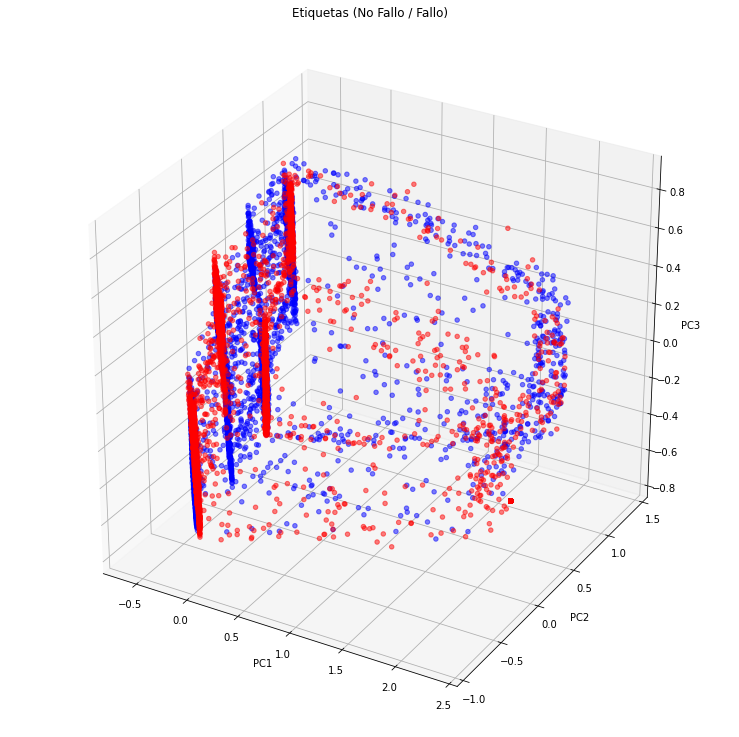

In [ ]:
fig = plt.figure()
fig.set_size_inches(13, 13)
ax = fig.add_subplot(111, projection = '3d')

x = dataset_total_pca[:, 0]
y = dataset_total_pca[:, 1]
z = dataset_total_pca[:, 2]

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.title.set_text("Etiquetas (No Fallo / Fallo)")
ax.scatter(x[targets_total == 0], y[targets_total == 0], z[targets_total == 0], s = 20, c='b', alpha=0.5)
ax.scatter(x[targets_total == 1], y[targets_total == 1], z[targets_total == 1], s = 20, c='r', alpha=0.5)


plt.show()

NameError: ignored

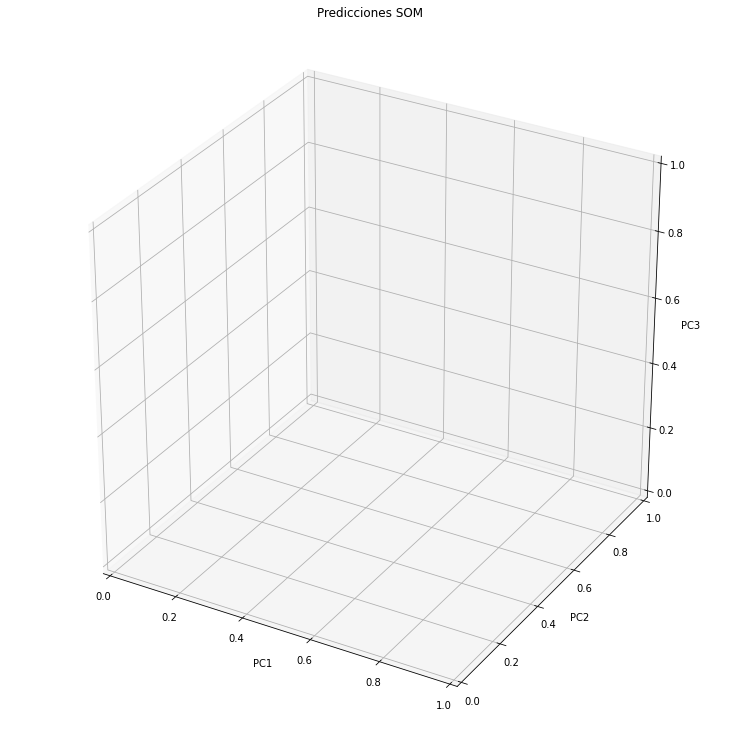

In [ ]:
fig = plt.figure()
fig.set_size_inches(13, 13)
ax = fig.add_subplot(111, projection = '3d')

x = dataset_total_pca[:, 0]
y = dataset_total_pca[:, 1]
z = dataset_total_pca[:, 2]

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.title.set_text("Predicciones SOM")
ax.scatter(x[predictions == 0], y[predictions == 0], z[predictions == 0], s = 20, c='b', alpha=0.5)
ax.scatter(x[predictions == 1], y[predictions == 1], z[predictions == 1], s = 20, c='r', alpha=0.5)


plt.show()

Se puede notar que en esta implementación de mapa auto organizados se obtienen dos grupos que corresponden a cada una de las herraduras que se habían observado al graficar las tres primeras componentes en un primer momento. La división realizada por SOM tiene el incoveniente de que incluye en el cluster de no fallo las columnas de puntos que corresponden a los fallos de fuga de aceite.

# Analisis con PCA

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

## Bootstrap 

### Decision Trees

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
scores_decision_trees_pca = []
number_rounds = 100

for round in tqdm(range(number_rounds)):
  X_train, X_test, y_train, y_test = train_test_split(dataset_total_pca[:, 0:5], targets_total, test_size=0.4)

  clf_tree_pca = tree.DecisionTreeClassifier()
  clf_tree_pca = clf_tree_pca.fit(X_train, y_train)

  scores_decision_trees_pca.append(clf_tree_pca.score(X_test, y_test))

scores_decision_trees_pca = np.array(scores_decision_trees_pca)

100%|██████████| 100/100 [00:03<00:00, 27.20it/s]


In [ ]:
trees_mean_pca = np.round(np.mean(scores_decision_trees_pca), 4)
trees_std_pca = np.round(np.std(scores_decision_trees_pca), 4)
print("-- Clasificador Árboles de Decisión --")
print("Intervalo de confianza de la precisión: ", trees_mean_pca, "\u00B1", trees_std_pca)

-- Clasificador Árboles de Decisión --
Intervalo de confianza de la precisión:  0.8463 ± 0.0058


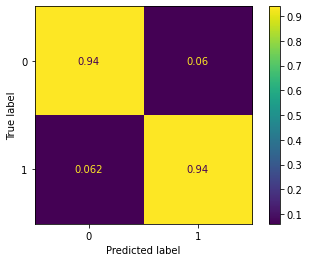

In [ ]:
def plot_confusion_matrix(inputs, targets, model):
  plt.figure
  y_pred = model.predict(inputs)
  cm = confusion_matrix(targets, y_pred, normalize = 'pred')

  cm_display = ConfusionMatrixDisplay(cm).plot()

plot_confusion_matrix(dataset_total_pca[:, 0:5], targets_total, clf_tree_pca)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

scores_logistic_pca = []
number_rounds = 100

for round in tqdm(range(number_rounds)):
  X_train, X_test, y_train, y_test = train_test_split(dataset_total_pca[:, 0:5], targets_total, test_size=0.4)

  logreg_pca = LogisticRegression(C=1e5)
  logreg_pca.fit(X_train, y_train)

  scores_logistic_pca.append(logreg_pca.score(X_test, y_test))

scores_logistic_pca = np.array(scores_logistic_pca)

100%|██████████| 100/100 [00:02<00:00, 45.14it/s]


In [ ]:
logreg_mean_pca = np.round(np.mean(scores_logistic_pca), 4)
logreg_std_pca = np.round(np.std(scores_logistic_pca), 4)
print("-- Clasificador Regresión Logística --")
print("Intervalo de confianza de la precisión: ", logreg_mean_pca, "\u00B1", logreg_std_pca)

-- Clasificador Regresión Logística --
Intervalo de confianza de la precisión:  0.5942 ± 0.0186


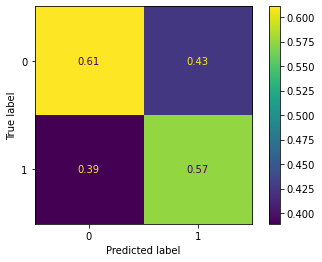

In [ ]:
plot_confusion_matrix(dataset_total_pca[:, 0:5], targets_total, logreg_pca)

### K-nearest neighbors

In [ ]:
from sklearn import neighbors

scores_knn_pca = []
number_rounds = 100

n_neighbors = 15
weights = "uniform"

for round in tqdm(range(number_rounds)):
  X_train, X_test, y_train, y_test = train_test_split(dataset_total_pca[:, 0:5], targets_total, test_size=0.4)

  clf_knn_pca = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
  clf_knn_pca.fit(X_train, y_train)

  scores_knn_pca.append(clf_knn_pca.score(X_test, y_test))
  
scores_knn_pca = np.array(scores_knn_pca)

100%|██████████| 100/100 [00:13<00:00,  7.56it/s]


In [ ]:
knn_mean_pca = np.round(np.mean(scores_knn_pca), 4)
knn_std_pca = np.round(np.std(scores_knn_pca), 4)
print("-- Clasificador K Nearest Neighbors --")
print("Intervalo de confianza de la precisión: ", knn_mean_pca, "\u00B1", knn_std_pca)

-- Clasificador K Nearest Neighbors --
Intervalo de confianza de la precisión:  0.838 ± 0.0052


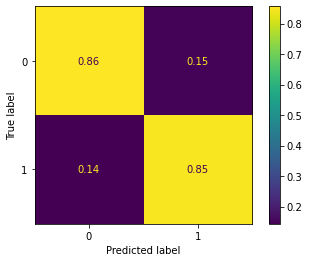

In [ ]:
plot_confusion_matrix(dataset_total_pca[:, 0:5], targets_total, clf_knn_pca)

### Regresión Ridge

In [ ]:
from sklearn import linear_model

scores_ridge_reg_pca = []
number_rounds = 100

for round in tqdm(range(number_rounds)):
  X_train, X_test, y_train, y_test = train_test_split(dataset_total_pca[:, 0:5], targets_total, test_size=0.4)
  ridge_classi_pca = linear_model.RidgeClassifier()
  ridge_classi_pca.fit(X_train, y_train)

  scores_ridge_reg_pca.append(ridge_classi_pca.score(X_test, y_test))

scores_ridge_reg_pca = np.array(scores_ridge_reg_pca)

100%|██████████| 100/100 [00:00<00:00, 111.57it/s]


In [ ]:
ridge_mean_pca = np.round(np.mean(scores_ridge_reg_pca), 4)
ridge_std_pca = np.round(np.std(scores_ridge_reg_pca), 4)
print("-- Clasificador Ridge --")
print("Intervalo de confianza de la precisión: ", ridge_mean_pca, "\u00B1", ridge_std_pca)

-- Clasificador Ridge --
Intervalo de confianza de la precisión:  0.6001 ± 0.0177


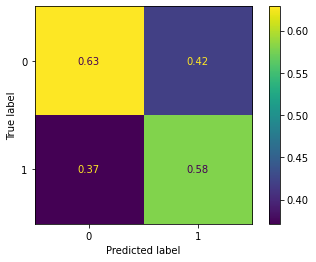

In [ ]:
plot_confusion_matrix(dataset_total_pca[:, 0:5], targets_total, ridge_classi_pca)

### MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

scores_mlp_pca = []
number_rounds = 100

for round in tqdm(range(number_rounds)):
  X_train, X_test, y_train, y_test = train_test_split(dataset_total_pca[:, 0:5], targets_total, test_size=0.4)
  clf_mlp_pca = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(40, 1), max_iter=400)
  clf_mlp_pca.fit(X_train, y_train)

  scores_mlp_pca.append(clf_mlp_pca.score(X_train, y_train))

scores_mlp_pca = np.array(scores_mlp_pca)

  4%|▍         | 4/100 [00:11<04:27,  2.79s/it]/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
  7%|▋         | 7/100 [00:24<05:21,  3.46s/it]/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
  9%|▉         | 9/100 [00:36<07:14,  4.77s/it]/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
 13%|█▎        | 13/100 [00:54<06:26,  4.45s/it]/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

In [ ]:
mlp_mean_pca = np.round(np.mean(scores_mlp_pca), 4)
mlp_std_pca = np.round(np.std(scores_mlp_pca), 4)
print("-- Clasificador Perceptrón Multi Capa --")
print("Intervalo de confianza de la precisión: ", mlp_mean_pca, "\u00B1", mlp_std_pca)

-- Clasificador Perceptrón Multi Capa --
Intervalo de confianza de la precisión:  0.7463 ± 0.1246


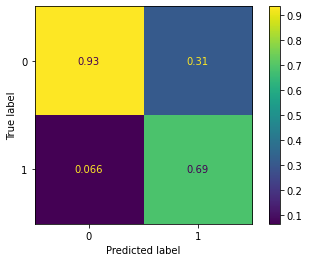

In [ ]:
plot_confusion_matrix(dataset_total_pca[:, 0:5], targets_total, clf_mlp_pca)

### Máquinas de soporte vectorial

In [ ]:
from sklearn.svm import SVC
from tqdm import tqdm

scores_svm_pca = []

for round in tqdm(range(number_rounds)):
  X_train, X_test, y_train, y_test = train_test_split(dataset_total_pca[:, 0:5], targets_total, test_size=0.4)
  svm_pca =  SVC()
  svm_pca = svm_pca.fit(X_train, y_train)

  scores_svm_pca.append(svm_pca.score(X_train, y_train))

scores_svm_pca = np.array(scores_svm_pca)

100%|██████████| 100/100 [03:03<00:00,  1.83s/it]


In [ ]:
svm_mean_pca = np.round(np.mean(scores_svm_pca), 4)
svm_std_pca = np.round(np.std(scores_svm_pca), 4)
print("-- Clasificador Perceptrón Multi Capa --")
print("Intervalo de confianza de la precisión: ", svm_mean_pca, "\u00B1", svm_std_pca)

-- Clasificador Perceptrón Multi Capa --
Intervalo de confianza de la precisión:  0.7848 ± 0.0039


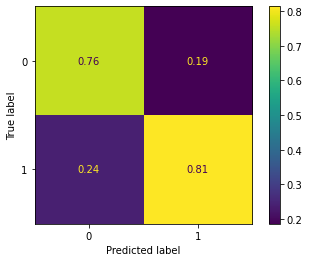

In [ ]:
plot_confusion_matrix(dataset_total_pca[:, 0:5], targets_total, svm_pca)

# Proceso sin utilizar PCA

## Bootstrap 

### Decision Trees

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
scores_decision_trees_norm = []
number_rounds = 100

for round in tqdm(range(number_rounds)):
  X_train, X_test, y_train, y_test = train_test_split(dataset_total, targets_total, test_size=0.4)

  clf_tree_norm = tree.DecisionTreeClassifier()
  clf_tree_norm = clf_tree_norm.fit(X_train, y_train)

  scores_decision_trees_norm.append(clf_tree_norm.score(X_test, y_test))

scores_decision_trees_norm = np.array(scores_decision_trees_norm)

100%|██████████| 100/100 [00:03<00:00, 28.43it/s]


In [ ]:
trees_mean_norm = np.round(np.mean(scores_decision_trees_norm), 4)
trees_std_norm = np.round(np.std(scores_decision_trees_norm), 4)
print("-- Clasificador Árboles de Decisión --")
print("Intervalo de confianza de la precisión: ", trees_mean_norm, "\u00B1", trees_std_norm)

-- Clasificador Árboles de Decisión --
Intervalo de confianza de la precisión:  0.9616 ± 0.0042


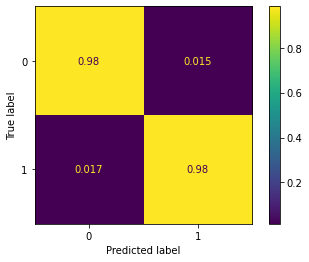

In [ ]:
def plot_confusion_matrix(inputs, targets, model):
  plt.figure
  y_pred = model.predict(inputs)
  cm = confusion_matrix(targets, y_pred, normalize = 'pred')

  cm_display = ConfusionMatrixDisplay(cm).plot()

plot_confusion_matrix(dataset_total, targets_total, clf_tree_norm)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

scores_logistic_norm = []
number_rounds = 100

for round in tqdm(range(number_rounds)):
  X_train, X_test, y_train, y_test = train_test_split(dataset_total, targets_total, test_size=0.4)

  logreg_norm = LogisticRegression(C=1e5)
  logreg_norm.fit(X_train, y_train)

  scores_logistic_norm.append(logreg_norm.score(X_test, y_test))

scores_logistic_norm = np.array(scores_logistic_norm)

  0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
  1%|          | 1/100 [00:00<00:11,  8.42it/s]/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver optio

In [ ]:
logreg_mean_norm = np.round(np.mean(scores_logistic_norm), 4)
logreg_std_norm = np.round(np.std(scores_logistic_norm), 4)
print("-- Clasificador Regresión Logística --")
print("Intervalo de confianza de la precisión: ", logreg_mean_norm, "\u00B1", logreg_std_norm)

-- Clasificador Regresión Logística --
Intervalo de confianza de la precisión:  0.6627 ± 0.0073


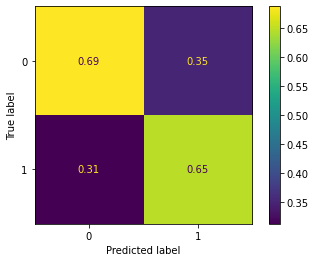

In [ ]:
plot_confusion_matrix(dataset_total, targets_total, logreg_norm)

### K-nearest neighbors

In [ ]:
from sklearn import neighbors

scores_knn_norm = []
number_rounds = 100

n_neighbors = 15
weights = "uniform"

for round in tqdm(range(number_rounds)):
  X_train, X_test, y_train, y_test = train_test_split(dataset_total, targets_total, test_size=0.4)

  clf_knn_norm = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
  clf_knn_norm.fit(X_train, y_train)

  scores_knn_norm.append(clf_knn_norm.score(X_test, y_test))
  
scores_knn_norm = np.array(scores_knn_norm)

100%|██████████| 100/100 [00:52<00:00,  1.91it/s]


In [ ]:
knn_mean_norm = np.round(np.mean(scores_knn_norm), 4)
knn_std_norm = np.round(np.std(scores_knn_norm), 4)
print("-- Clasificador K Nearest Neighbors --")
print("Intervalo de confianza de la precisión: ", knn_mean_norm, "\u00B1", knn_std_norm)

-- Clasificador K Nearest Neighbors --
Intervalo de confianza de la precisión:  0.861 ± 0.005


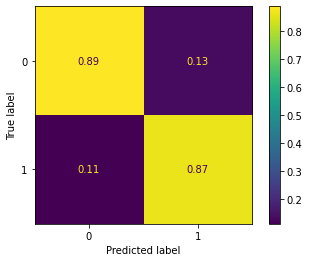

In [ ]:
plot_confusion_matrix(dataset_total, targets_total, clf_knn_norm)

### Regresión Ridge

In [ ]:
from sklearn import linear_model

scores_ridge_reg_norm = []
number_rounds = 100

for round in tqdm(range(number_rounds)):
  X_train, X_test, y_train, y_test = train_test_split(dataset_total, targets_total, test_size=0.4)
  ridge_classi_norm = linear_model.RidgeClassifier()
  ridge_classi_norm.fit(X_train, y_train)

  scores_ridge_reg_norm.append(ridge_classi_norm.score(X_test, y_test))

scores_ridge_reg_norm = np.array(scores_ridge_reg_norm)

100%|██████████| 100/100 [00:01<00:00, 92.50it/s]


In [ ]:
ridge_mean_norm = np.round(np.mean(scores_ridge_reg_norm), 4)
ridge_std_norm = np.round(np.std(scores_ridge_reg_norm), 4)
print("-- Clasificador Ridge --")
print("Intervalo de confianza de la precisión: ", ridge_mean_norm, "\u00B1", ridge_std_norm)

-- Clasificador Ridge --
Intervalo de confianza de la precisión:  0.6729 ± 0.0061


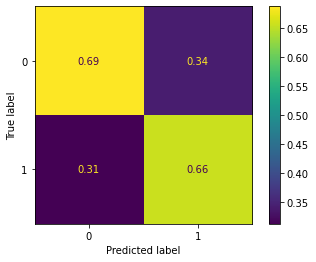

In [ ]:
plot_confusion_matrix(dataset_total, targets_total, ridge_classi_norm)

### MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

scores_mlp_norm = []
number_rounds = 100

for round in tqdm(range(number_rounds)):
  X_train, X_test, y_train, y_test = train_test_split(dataset_total, targets_total, test_size=0.4)
  clf_mlp_norm = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(40, 1), max_iter=400)
  clf_mlp_norm.fit(X_train, y_train)

  scores_mlp_norm.append(clf_mlp_norm.score(X_train, y_train))

scores_mlp_norm = np.array(scores_mlp_norm)

  1%|          | 1/100 [00:01<02:03,  1.25s/it]/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
  2%|▏         | 2/100 [00:07<07:07,  4.36s/it]/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
  6%|▌         | 6/100 [00:32<09:01,  5.76s/it]/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
  8%|▊         | 8/100 [00:42<07:50,  5.11s/it]/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: 

In [ ]:
mlp_mean_norm = np.round(np.mean(scores_mlp_norm), 4)
mlp_std_norm = np.round(np.std(scores_mlp_norm), 4)
print("-- Clasificador Perceptrón Multi Capa --")
print("Intervalo de confianza de la precisión: ", mlp_mean_norm, "\u00B1", mlp_std_norm)

-- Clasificador Perceptrón Multi Capa --
Intervalo de confianza de la precisión:  0.7094 ± 0.1834


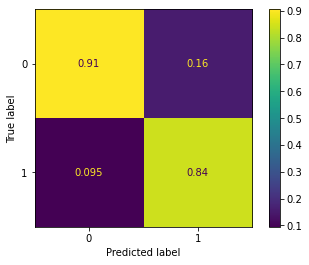

In [ ]:
plot_confusion_matrix(dataset_total, targets_total, clf_mlp_norm)

### Maquinas de soporte vectorial

In [ ]:
from sklearn.svm import SVC
from tqdm import tqdm

scores_svm_norm = []

for round in tqdm(range(number_rounds)):
  X_train, X_test, y_train, y_test = train_test_split(dataset_total, targets_total, test_size=0.4)
  svm_norm =  SVC()
  svm_norm = svm_norm.fit(X_train, y_train)

  scores_svm_norm.append(svm_norm.score(X_train, y_train))

scores_svm_norm = np.array(scores_svm_norm)

100%|██████████| 100/100 [03:40<00:00,  2.21s/it]


In [ ]:
svm_mean_norm = np.round(np.mean(scores_svm_norm), 4)
svm_std_norm = np.round(np.std(scores_svm_norm), 4)
print("-- Clasificador Perceptrón Multi Capa --")
print("Intervalo de confianza de la precisión: ", svm_mean_norm, "\u00B1", svm_std_norm)

-- Clasificador Perceptrón Multi Capa --
Intervalo de confianza de la precisión:  0.7863 ± 0.0038


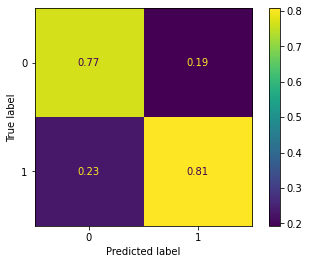

In [ ]:
plot_confusion_matrix(dataset_total, targets_total, svm_norm)

# Comparación de los modelos

In [ ]:
from tabulate import tabulate

data = [["Arbol", "1-5 PC", trees_mean_pca, trees_std_pca],
        ["Arbol", "Normalizado", trees_mean_norm, trees_std_norm],
        ["KNN", "1-5 PC", knn_mean_pca, knn_std_pca],
        ["KNN", "Normalizado", knn_mean_norm, knn_std_norm ],
        ["Reg. Logística", "1-5 PC", logreg_mean_pca, logreg_std_pca],
        ["Reg. Logística", "Normalizado", logreg_mean_norm, logreg_std_norm],
        ["Reg. Ridge", "1-5 PC", ridge_mean_pca, ridge_std_pca],
        ["Reg. Ridge", "Normalizado", ridge_mean_norm, ridge_std_norm],
        ["MLP", "1-5 PC", mlp_mean_pca, mlp_std_pca],
        ["MLP", "Normalizado", mlp_mean_norm, mlp_std_norm],
        ["SVM", "1-5 PC", svm_mean_pca, svm_std_pca],
        ["SVM", "Normalizado", svm_mean_norm, svm_std_norm]]

print(tabulate(data, headers=["Modelo", "Datos", "Precisión", "Desviación estándar"]))

Modelo          Datos          Precisión    Desviación estándar
--------------  -----------  -----------  ---------------------
Arbol           1-5 PC            0.8463                 0.0058
Arbol           Normalizado       0.9616                 0.0042
KNN             1-5 PC            0.838                  0.0052
KNN             Normalizado       0.861                  0.005
Reg. Logística  1-5 PC            0.5942                 0.0186
Reg. Logística  Normalizado       0.6627                 0.0073
Reg. Ridge      1-5 PC            0.6001                 0.0177
Reg. Ridge      Normalizado       0.6729                 0.0061
MLP             1-5 PC            0.7463                 0.1246
MLP             Normalizado       0.7094                 0.1834
SVM             1-5 PC            0.7848                 0.0039
SVM             Normalizado       0.7863                 0.0038


# Modelo Seleccionado

In [ ]:
input_train, input_val, target_train, target_val = train_test_split(dataset_total, targets_total, test_size=0.5)
input_val, input_test, target_val, target_test = train_test_split(dataset_total, targets_total, test_size=0.4)

tree_norm_sel = tree.DecisionTreeClassifier()
tree_norm_sel = tree_norm_sel.fit(input_train, target_train)

scores_train = tree_norm_sel.score(input_train, target_train)
scores_val = tree_norm_sel.score(input_val, target_val)
scores_test = tree_norm_sel.score(input_test, target_test)

print("------------------------------------------")
print("Precisión en el dataset de entrenamiento: ", scores_train)
print("------------------------------------------")
print("Precisión en el dataset de validación: ", scores_val)
print("------------------------------------------")
print("Precisión en el dataset de testeo: ", scores_test)

------------------------------------------
Precisión en el dataset de entrenamiento:  1.0
------------------------------------------
Precisión en el dataset de validación:  0.981299402352034
------------------------------------------
Precisión en el dataset de testeo:  0.9809193408499567


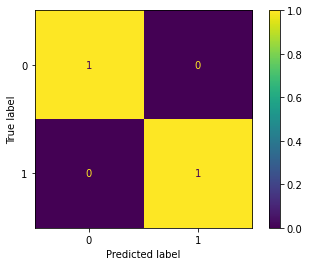

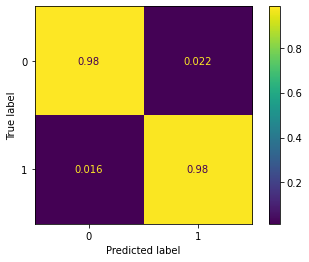

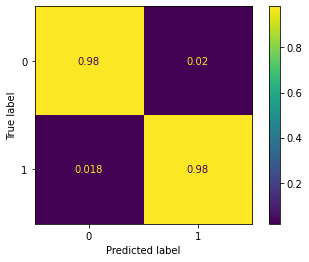

In [ ]:
plot_confusion_matrix(input_train, target_train, tree_norm_sel)
plot_confusion_matrix(input_val, target_val, tree_norm_sel)
plot_confusion_matrix(input_test, target_test, tree_norm_sel)

# Guardado del Modelo

In [ ]:
from joblib import dump, load
# Guardamos el modelo entrenado
dump(tree_norm_sel, 'modelo_seleccionado_arboles_decision.joblib') 

['modelo_seleccionado_arboles_decision.joblib']

# Cargando el Modelo

In [ ]:
from joblib import dump, load
# Guardamos el modelo entrenado
loaded_m = load('modelo_seleccionado_arboles_decision.joblib') 

# Prueba con valores manuales

In [ ]:
# Predicción para un vector de ceros
loaded_m.predict(np.zeros((1, 19)))

array([1.])

In [ ]:
# Predicción para un vector de unos
loaded_m.predict(np.ones((1, 19)))

array([0.])